In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
medicare = pd.read_csv('MUP_PHY_R23_P05_V10_D21_Geo.csv', low_memory=False)

In [3]:
medicare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271635 entries, 0 to 271634
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Rndrng_Prvdr_Geo_Lvl   271635 non-null  object 
 1   Rndrng_Prvdr_Geo_Cd    258353 non-null  object 
 2   Rndrng_Prvdr_Geo_Desc  271635 non-null  object 
 3   HCPCS_Cd               271635 non-null  object 
 4   HCPCS_Desc             271635 non-null  object 
 5   HCPCS_Drug_Ind         271635 non-null  object 
 6   Place_Of_Srvc          271635 non-null  object 
 7   Tot_Rndrng_Prvdrs      271635 non-null  int64  
 8   Tot_Benes              271635 non-null  int64  
 9   Tot_Srvcs              271635 non-null  float64
 10  Tot_Bene_Day_Srvcs     271635 non-null  int64  
 11  Avg_Sbmtd_Chrg         271635 non-null  float64
 12  Avg_Mdcr_Alowd_Amt     271635 non-null  float64
 13  Avg_Mdcr_Pymt_Amt      271635 non-null  float64
 14  Avg_Mdcr_Stdzd_Amt     271635 non-nu

In [4]:
medicare.isnull().sum()

Rndrng_Prvdr_Geo_Lvl         0
Rndrng_Prvdr_Geo_Cd      13282
Rndrng_Prvdr_Geo_Desc        0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

In [5]:
medicare.shape

(271635, 15)

In [6]:
medicare.HCPCS_Desc

0                              Adm sarscov2 30mcg/0.3ml 1st
1                              Adm sarscov2 30mcg/0.3ml 1st
2                              Adm sarscov2 30mcg/0.3ml 2nd
3                              Adm sarscov2 30mcg/0.3ml 2nd
4                                Fee covid-19 vac 1 booster
                                ...                        
271630    Annual wellness visit, includes a personalized...
271631    Face-to-face behavioral counseling for obesity...
271632         Injection, methylprednisolone acetate, 40 mg
271633         Injection, ketorolac tromethamine, per 15 mg
271634    Injection, triamcinolone acetonide, not otherw...
Name: HCPCS_Desc, Length: 271635, dtype: object

In [7]:
# Removing null value column

medicare = medicare.drop('Rndrng_Prvdr_Geo_Cd', axis = 1)

In [8]:
medicare.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,279,25735,26341.0,26341,42.415088,20.884538,20.884538,20.815810
1,National,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,57563,9080086,9346114.7,9345929,44.186609,25.759089,25.759086,25.205064
2,National,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,F,187,24576,24649.0,24649,65.965120,31.794918,31.794918,31.521371
3,National,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,52326,8897346,8994332.2,8994143,53.747218,35.085090,35.085090,34.497677
4,National,National,0003A,Fee covid-19 vac 1 booster,N,F,211,5364,5371.0,5371,69.139801,38.653349,38.653349,39.183323


In [9]:
medicare_txt = medicare.HCPCS_Desc

In [10]:
medicare_txt = medicare_txt.str.lower()

In [11]:
medicare_txt.head()

0    adm sarscov2 30mcg/0.3ml 1st
1    adm sarscov2 30mcg/0.3ml 1st
2    adm sarscov2 30mcg/0.3ml 2nd
3    adm sarscov2 30mcg/0.3ml 2nd
4      fee covid-19 vac 1 booster
Name: HCPCS_Desc, dtype: object

In [12]:
import re

In [13]:
def clean_txt(text):
    return ' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])", " ",text).split())

In [14]:
medicare_txt = [str(clean_txt(x)) for x in medicare_txt]

In [15]:
import nltk
from nltk.corpus import stopwords

In [16]:
stop_words = set(stopwords.words("english"))

In [21]:
medicare_words = medicare_txt.str.split()

AttributeError: 'list' object has no attribute 'str'

In [18]:
from wordcloud import WordCloud

In [19]:
wordcloud = WordCloud(width = 1000, 
                     height = 500,
                     stopwords = stop_words).generate(str(medicare_txt))

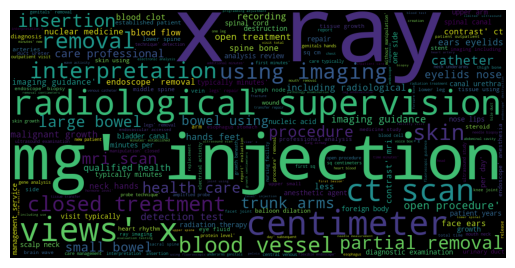

In [20]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
medicare_words = medicare_words.map(' '.join)

NameError: name 'medicare_words' is not defined